# Assignment 4

In [2]:
import numpy as np
import sympy as sp
from qutip import *
import matplotlib.pyplot as plt
sp.init_printing()

## Problem 1(a)

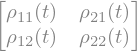

In [3]:
# Set up the density matrix
t = sp.Symbol('t', real=True)
rho = sp.Matrix([[sp.Function('rho_' + i + j)(t) for i in ['1', '2']] for j in ['1', '2']])
# rho[1,1] = 1 - rho[0,0]
rho

In [4]:
# Define the lowering operator
sm = sp.Matrix([[0, 0], [1, 0]])

commutator = lambda A, B: A*B - B*A
antiCommutator = lambda A, B: A*B + B*A

In [5]:
Omega = 0  #sp.symbols('Omega')
Gamma = sp.symbols('Gamma')
omega = sp.symbols('omega')

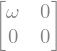

In [6]:
# Define the Hamiltonian
H = omega * sm.H * sm + Omega * (sm.H + sm) 
H

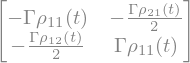

In [7]:
# Define the Lindblad operator
L = Gamma * (sm * rho * sm.H - sp.Rational(1,2) * antiCommutator(sm.H * sm, rho))
L

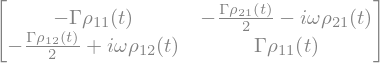

In [8]:
rhs = -sp.I * commutator(H, rho) + L
rhs

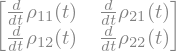

In [9]:
lhs = rho.applyfunc(lambda x: sp.diff(x, t))
lhs

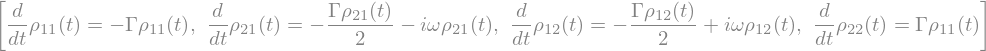

In [10]:
eqnlist = [sp.Eq(lhs[i,j], rhs[i,j]) for i in range(2) for j in range(2)]
eqnlist

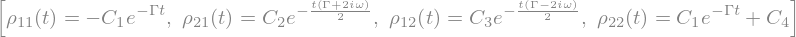

In [11]:
solution = sp.dsolve(eqnlist)
solution

## Problem 1(b)

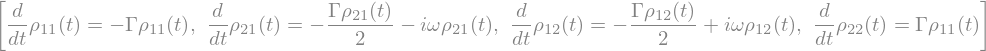

In [12]:
# Set up the density matrix
t = sp.Symbol('t', real=True)
rho = sp.Matrix([[sp.Function('rho_' + i + j)(t) for i in ['1', '2']] for j in ['1', '2']])

# Define the lowering operator
sm = sp.Matrix([[0, 0], [1, 0]])

commutator = lambda A, B: A*B - B*A
antiCommutator = lambda A, B: A*B + B*A

Omega = 0  #sp.symbols('Omega')
Gamma = sp.symbols('Gamma')
omega = sp.symbols('omega')

H = omega * sm.H * sm + Omega * (sm.H + sm) 

L = Gamma * (sm * rho * sm.H - sp.Rational(1,2) * antiCommutator(sm.H * sm, rho))

rhs = -sp.I * commutator(H, rho) + L
lhs = rho.applyfunc(lambda x: sp.diff(x, t))
eqnlist = [sp.Eq(lhs[i,j], rhs[i,j]) for i in range(2) for j in range(2)]
eqnlist

In [13]:
ics = {rho[0,0].subs(t, 0): 1, rho[1,1].subs(t, 0): 0, rho[0,1].subs(t, 0): 0, rho[1,0].subs(t, 0): 0}
solution = sp.dsolve(eqnlist, ics=ics)
solution

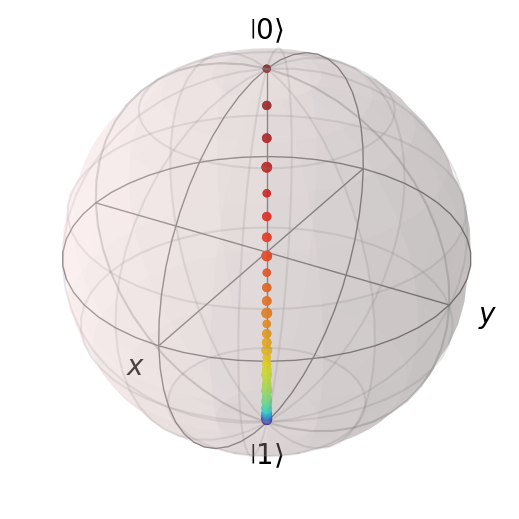

In [14]:
# lambdify the solution
rho11 = sp.lambdify([t, Gamma], solution[0].rhs, 'numpy')
rho22 = sp.lambdify([t, Gamma], solution[3].rhs, 'numpy')

def get_dm(t, Gamma=1):
    # In units of Gamma
    return Qobj(np.array([[rho11(t, Gamma), 0], [0, rho22(t, Gamma)]]))

# Plot the solution on the Bloch sphere
b = Bloch()
N = 50
b = Bloch()
for i,R in enumerate(np.linspace(0, 5, N)):
    b.add_states(get_dm(R), 'point')
    b.point_color = plt.cm.jet(np.linspace(1, 0, N))
    b.point_marker = ['o']
b.show()

## Problem 1(c)

The notation is 

$$
\begin{align}
R_1 = 2 \rm Re [\tilde{\rho}_{ge}] \\
R_2 = 2 \rm Im [\tilde{\rho}_{eg}] \\
R_3 = \rho_{ee} - \rho_{gg}
\end{align}
$$

where

$$
\rho=\frac{1}{2}\left(\begin{array}{cc}
1+R_{3} & R_{1}-iR_{2}\\
R_{1}+iR_{2} & 1-R_{3}
\end{array}\right).
$$

We have the initial condition

$$
\rho(0)=\left(\begin{array}{cc}
1/2 & 1/2\\
1/2 & 1/2
\end{array}\right).
$$

c:\Users\chris\miniconda3\envs\phys\Lib\site-packages\qutip\bloch.py:752: RuntimeWarning: invalid value encountered in divide
  if any(abs(dist - dist[0]) / dist[0] > 1e-12):


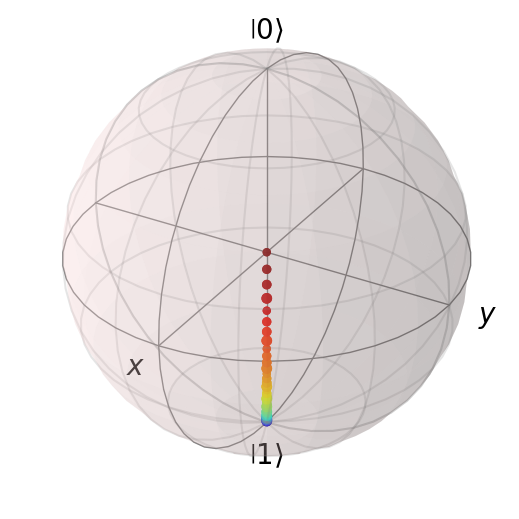

In [15]:
# Set up the density matrix
t = sp.Symbol('t', real=True)
rho = sp.Matrix([[sp.Function('rho_' + i + j)(t) for i in ['1', '2']] for j in ['1', '2']])

# Define the lowering operator
sm = sp.Matrix([[0, 0], [1, 0]])

commutator = lambda A, B: A*B - B*A
antiCommutator = lambda A, B: A*B + B*A

Omega = 0  #sp.symbols('Omega')
Gamma = sp.symbols('Gamma')
omega = sp.symbols('omega')

H = omega * sm.H * sm + Omega * (sm.H + sm) 

L = Gamma * (sm * rho * sm.H - sp.Rational(1,2) * antiCommutator(sm.H * sm, rho))

rhs = -sp.I * commutator(H, rho) + L
lhs = rho.applyfunc(lambda x: sp.diff(x, t))
eqnlist = [sp.Eq(lhs[i,j], rhs[i,j]) for i in range(2) for j in range(2)]

ics = {rho[0,0].subs(t, 0): 1/2, rho[1,1].subs(t, 0): 1/2, rho[0,1].subs(t, 0): 1/2, rho[1,0].subs(t, 0): 1/2}
solution = sp.dsolve(eqnlist, ics=ics)

# lambdify the solution
rho11 = sp.lambdify([t, Gamma], solution[0].rhs, 'numpy')
rho22 = sp.lambdify([t, Gamma], solution[3].rhs, 'numpy')

def get_dm(t, Gamma=1):
    # In units of Gamma
    return Qobj(np.array([[rho11(t, Gamma), 0], [0, rho22(t, Gamma)]]))

# Plot the solution on the Bloch sphere
b = Bloch()
N = 50
b = Bloch()
for i,R in enumerate(np.linspace(0, 5, N)):
    b.add_states(get_dm(R), 'point')
    b.point_color = plt.cm.jet(np.linspace(1, 0, N))
    b.point_marker = ['o']
b.show()

## Problem 1(d)

In [16]:
# Define the density matrix
rho = sp.Matrix([[sp.symbols('rho_' + i + j) for i in ['1', '2']] for j in ['1', '2']])
rho[1,1] = 1 - rho[0,0]

# Define the Hamiltonian
OmegaR = sp.symbols('Omega_R')
H0 = omega * sm.H * sm + Omega * (sm.H + sm) 
HL = OmegaR * (sm + sm.H)
H = H0 + HL

# Define the Lindblad operator
L = Gamma * (sm * rho * sm.H - sp.Rational(1,2) * antiCommutator(sm.H * sm, rho))

# Steady-state
rhs = -sp.I * commutator(H, rho) + L
eqnlist = [sp.Eq(0, rhs[i,j]) for i in range(2) for j in range(2)]
solution = sp.solve(eqnlist, [rho[0,0], rho[0,1], rho[1,0]])
solution

# lambdify the solution
rho11 = sp.lambdify([omega, OmegaR, Gamma], solution[rho[0]], 'numpy')
rho12 = sp.lambdify([omega, OmegaR, Gamma], solution[rho[1]], 'numpy')
rho21 = sp.lambdify([omega, OmegaR, Gamma], solution[rho[2]], 'numpy')
rho22 = lambda omega, OmegaR, Gamma: 1 - rho11(omega, OmegaR, Gamma)

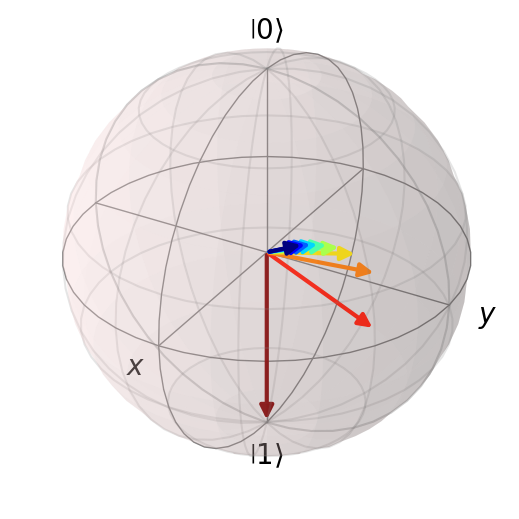

In [17]:
def get_dm(omega, OmegaR, Gamma=1):
    # In units of Gamma
    return Qobj([[rho11(omega, OmegaR, Gamma), rho12(omega, OmegaR, Gamma)], [rho21(omega, OmegaR, Gamma), rho22(omega, OmegaR, Gamma)]])

# Plot the solution on the Bloch sphere
N = 10
b = Bloch()
for i,R in enumerate(np.linspace(0, 5, N)):
    b.add_states(get_dm(1, R))
    b.vector_color = plt.cm.jet(np.linspace(1, 0, N))
b.show()

## Problem 3(a)

The Hamiltonian is 

$$
H = \hbar\Omega_0 \cos(\omega t) (e^{i \omega_{0} t} \sigma + e^{-i \omega_{0} t} \sigma^\dagger).
$$

Note that I have switched the definitions of 1 and 2 from the problem definition. This is because I want $\left| 0 \right>$ be the ground state and $\left| 1 \right>$ be the excited state. After discarding the rapidly oscillating terms, we have

$$
H = -\frac{\hbar \Omega_R}{2} \left( e^{i \Delta t} \sigma - e^{-i \Delta t} \sigma^\dagger \right)
$$

where $ \Delta = \omega_{0} - \omega $. We enter the rotating frame of the laser by applying the unitary operator $U = e^{i \Delta t \sigma^\dagger \sigma}$. In the rotating frame, the Hamiltonian is

$$
\begin{align}
\tilde{H}&=UHU^{\dagger}+i\hbar\frac{\partial U}{\partial t}U^{\dagger} \\
\tilde{H}&=-\hbar\Delta \sigma^{\dagger}\sigma-\frac{\hbar\Omega_{R}}{2}\left(\sigma+\sigma^{\dagger}\right)
\end{align}
$$

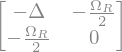

In [18]:
omega, omega12, t, Delta = sp.symbols('omega, omega_12, t, Delta', real=True)
H = -Delta * sm.H * sm - OmegaR / 2 * (sm + sm.H)
H

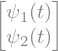

In [19]:
# Write out the Schrodinger equation
psi = sp.Matrix([sp.Function('psi_' + i)(t) for i in ['1', '2']])
psi

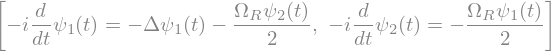

In [20]:
rhs = H * psi
lhs = -sp.I * sp.diff(psi, t)

eqnlist = [sp.Eq(lhs[i], rhs[i]) for i in range(2)]
eqnlist

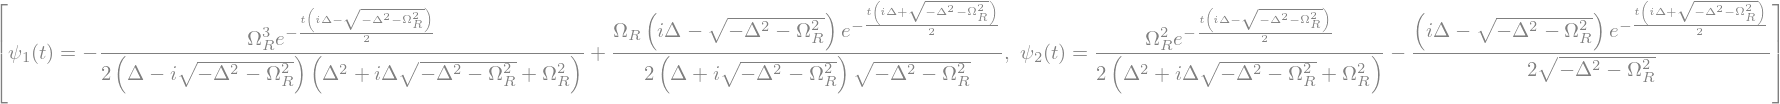

In [21]:
# initial conditions in state 1, with Delta=-1
ics = {psi[0].subs(t, 0): 0, psi[1].subs(t, 0): 1}
solution = sp.dsolve(eqnlist, [psi[0], psi[1]], ics=ics)
solution

In [22]:
# lambdify the solution
psi1_rwa = sp.lambdify([t, OmegaR, Delta], solution[0].rhs, 'numpy')
psi2_rwa = sp.lambdify([t, OmegaR, Delta], solution[1].rhs, 'numpy')

## Problem 3(b)

In [25]:
# Define symbols
OmegaR = 1
omega = 21
omega12 = 20

# Define the time-dependent parts of the Hamiltonian as functions
def H1_coeff(t, args):
    return -OmegaR * np.cos(omega * t) * np.exp(1j * omega12 * t)

def H2_coeff(t, args):
    return -OmegaR * np.cos(omega * t) * np.exp(-1j * omega12 * t)

# Operators
H1 = Qobj([[0, 1], [0, 0]])
H2 = Qobj([[0, 0], [1, 0]])

# Combine into a time-dependent Hamiltonian
H = [[H1, H1_coeff], [H2, H2_coeff]]

# Initial state (ground state)
psi0 = Qobj([[1], [0]])

# Time range
tlist = np.linspace(0, 10, 500)

result = sesolve(H, psi0, tlist)


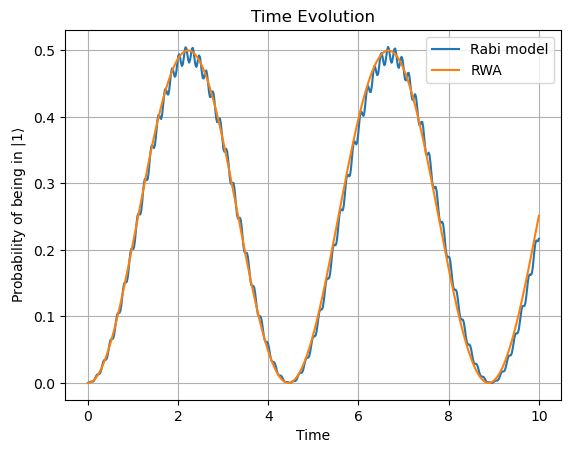

In [42]:
excited_state = Qobj([[0], [1]])
probabilities = np.array([abs(state.overlap(excited_state))**2 for state in result.states])

plt.plot(tlist, probabilities, label='Rabi model')
plt.plot(tlist, np.abs(psi1_rwa(tlist, OmegaR+0j, omega-omega12))**2, label='RWA')
plt.xlabel('Time')
plt.ylabel('Probability of being in $|1\\rangle$')
plt.title('Time Evolution')
plt.grid(True)
plt.legend()
plt.show()

The counter rotating terms go like

$$
H_{\text{counter}}\propto-\frac{\Omega_{R}}{2}e^{i2\omega t}\sigma
$$

So we expect oscillations with frequency $2 \omega$. It is not obvious to me how to get the amplitude. 